Natural Frequencies: [17.80167472 49.87918415 72.07750943]


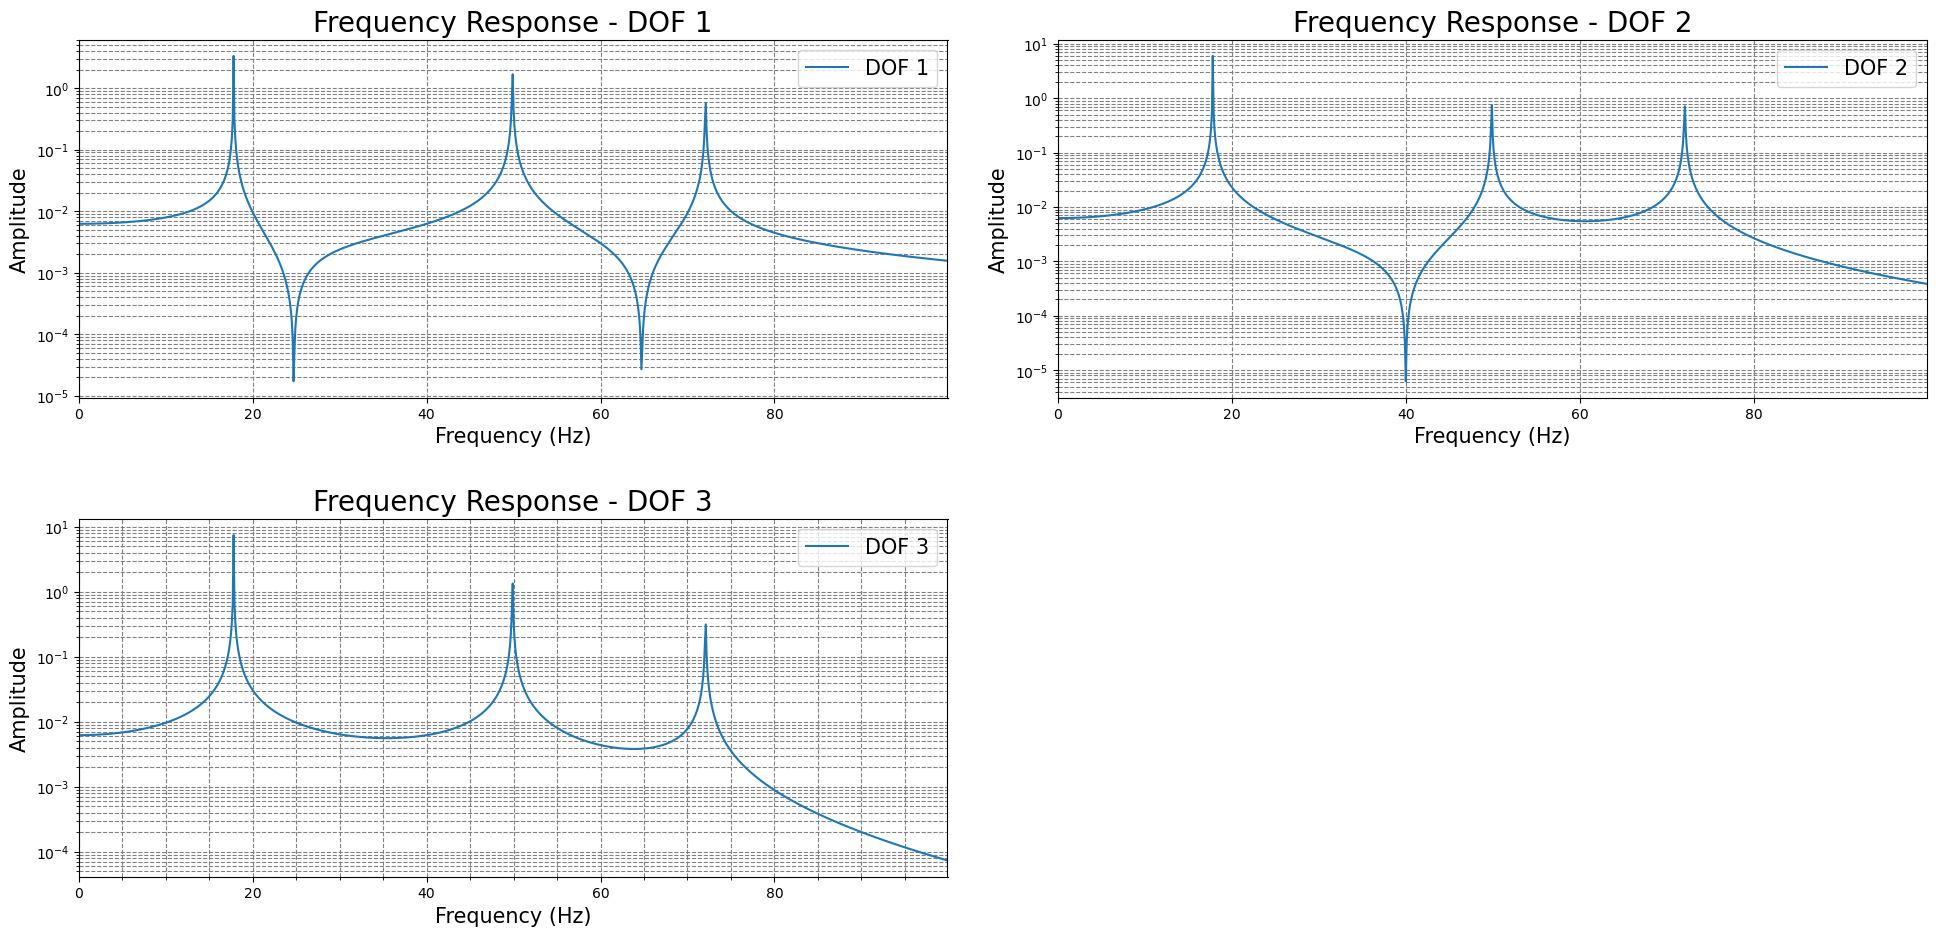

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from numpy.linalg import inv

# Constants
m0, m1, m2 = (1, 1, 1)
k0, k1, k2 = (1600, 1600, 1600)
alpha, beta = 0.001, 0.001
c1, c2, c3, c4 = (10, 50, 10, 2)

# Frequency range
w = np.arange(0, 100, 0.1)
x1, x2, x3, W = [], [], [], []

# Frequency Response Calculation
for i in w:
    M = np.array([[m0, 0, 0],
                  [0, m1, 0],
                  [0, 0, m2]])
    K = np.array([[k0 + k1, -k1, 0],
                  [-k1, k1 + k2, -k2],
                  [0, -k2, k2]])
    C = alpha * M + beta * K  # Damping matrix
    F = np.array([[10], [0], [0]]) #F0AMPLITUDEOFFORCE
    
    D = K - i**2 * M - 1j * C  # Note the use of complex i
    B = inv(D).dot(F)
    
    x1.append(abs(B[0, 0]))
    x2.append(abs(B[1, 0]))
    x3.append(abs(B[2, 0]))
    W.append(i)

# Natural Frequencies
u, _ = linalg.eigh(K, M)
nat_fre = np.sqrt(u)
print("Natural Frequencies:", nat_fre)

# Plotting
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.plot(W, x1, label='DOF 1')
plt.yscale("log")
plt.grid(which='both', color='0.5', linestyle='--')
plt.xlim(W[0], W[-1])
plt.title("Frequency Response - DOF 1", fontsize=20)
plt.xlabel("Frequency (Hz)", fontsize=15)
plt.ylabel("Amplitude", fontsize=15)
plt.legend(loc="best", fontsize=15)

plt.subplot(2, 2, 2)
plt.plot(W, x2, label='DOF 2')
plt.yscale("log")
plt.grid(which='both', color='0.5', linestyle='--')
plt.xlim(W[0], W[-1])
plt.title("Frequency Response - DOF 2", fontsize=20)
plt.xlabel("Frequency (Hz)", fontsize=15)
plt.ylabel("Amplitude", fontsize=15)
plt.legend(loc="best", fontsize=15)

plt.subplot(2, 2, 3)
plt.plot(W, x3, label='DOF 3')
plt.yscale("log")
plt.grid( which='both', color='0.5', linestyle='--')
plt.minorticks_on()
plt.xlim(W[0], W[-1])
plt.title("Frequency Response - DOF 3", fontsize=20)
plt.xlabel("Frequency (Hz)", fontsize=15)
plt.ylabel("Amplitude", fontsize=15)
plt.legend(loc="best", fontsize=15)

plt.tight_layout(pad=3)
plt.show()
